In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
import pandas as pd

In [7]:
irisdf = pd.DataFrame(iris.data,columns=iris.feature_names)

In [8]:
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
type(iris)

sklearn.utils.Bunch

In [14]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [17]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [20]:
irisdf["Type"] = iris.target

In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
irisdf.shape

(150, 8)

In [24]:
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa,versicolor,virginica,Type
0,5.1,3.5,1.4,0.2,NaN,NaN,NaN,0
1,4.9,3.0,1.4,0.2,NaN,NaN,NaN,0
2,4.7,3.2,1.3,0.2,NaN,NaN,NaN,0
3,4.6,3.1,1.5,0.2,NaN,NaN,NaN,0
4,5.0,3.6,1.4,0.2,NaN,NaN,NaN,0


In [25]:
irisdf.isna().sum()

sepal length (cm)      0
sepal width (cm)       0
petal length (cm)      0
petal width (cm)       0
setosa               150
versicolor           150
virginica            150
Type                   0
dtype: int64

In [26]:
irisdf.drop(["setosa","versicolor","virginica"],axis = 1,inplace=True)

In [27]:
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

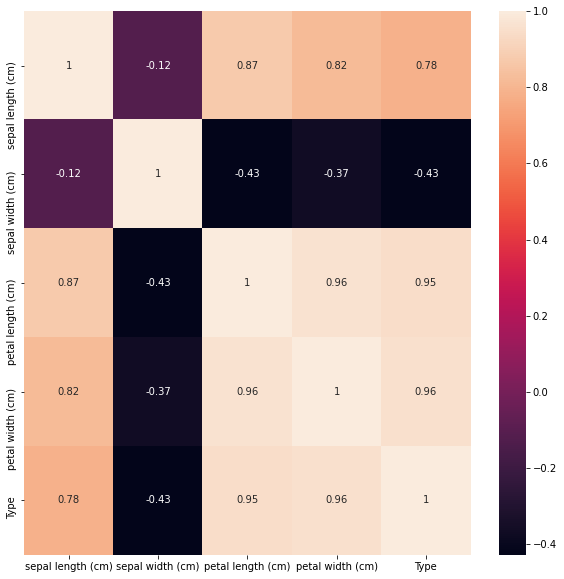

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(irisdf.corr(),annot=True)

In [28]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target)

In [36]:
X_train.shape

(112, 4)

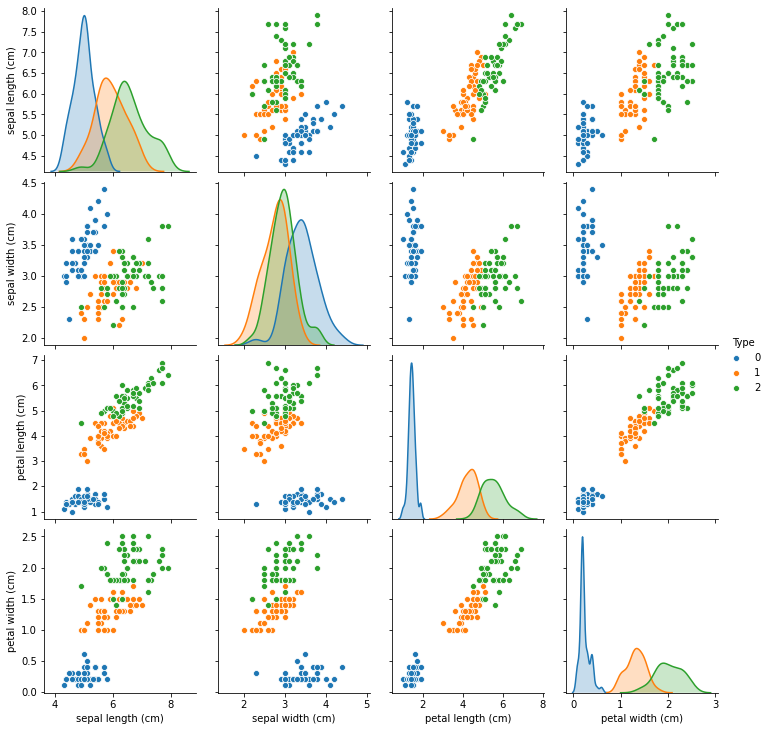

In [50]:
sns.pairplot(irisdf,hue="Type")
plt.show()

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

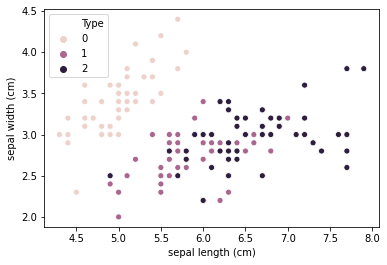

In [59]:
sns.scatterplot(x = "sepal length (cm)",y="sepal width (cm)",data=irisdf,hue="Type")

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier(n_neighbors=1)

In [63]:
type(knn)

sklearn.neighbors._classification.KNeighborsClassifier

In [64]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [65]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

<IPython.core.display.Javascript object>

X_new.shape: (1, 4)


In [66]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris.target_names[prediction]))

Prediction: [0]
Predicted target name: ['setosa']


In [67]:
y_pred = knn.predict(X_test)

In [68]:
np.mean(y_pred == y_test)

<IPython.core.display.Javascript object>

0.9736842105263158

In [70]:
knn.score(X_test,y_test)

0.9736842105263158